In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [103]:
data = pd.read_csv('HR-Employee-Attrition.csv')

In [104]:
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})
data['OverTime'] = data['OverTime'].map({'Yes': 1, 'No': 0})
data = pd.get_dummies(data, columns=['Department', 'JobRole'], drop_first=True, dtype=int)

In [105]:
print(data.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Department_Research & Development', 'Department_Sales',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative'],
      dtype='object'

In [106]:
x = data[['MonthlyIncome', 'YearsAtCompany', 'JobSatisfaction', 'WorkLifeBalance', 
          'Age', 'DistanceFromHome', 'Department_Research & Development', 'Department_Sales', 
          'OverTime', 'TotalWorkingYears', 'JobInvolvement', 'EnvironmentSatisfaction']]
y = data['Attrition']

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [107]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

smote = SMOTE(random_state=42, sampling_strategy=0.5)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [108]:

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=200, max_depth=10)
model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.84
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91       255
           1       0.36      0.23      0.28        39

    accuracy                           0.84       294
   macro avg       0.62      0.58      0.60       294
weighted avg       0.82      0.84      0.83       294



In [109]:
low_importance_features = x.columns[model.feature_importances_ < 0.02]
print("Low Importance Features:", low_importance_features)

Low Importance Features: Index([], dtype='object')


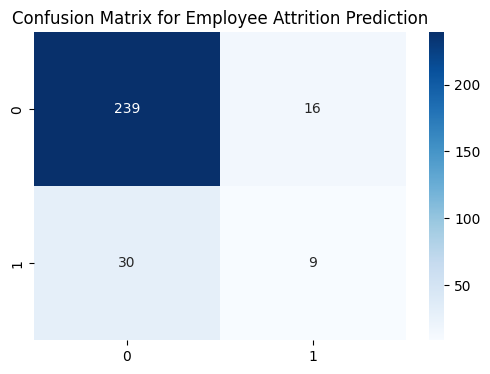

In [110]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Employee Attrition Prediction')
plt.show()